In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
	cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
	df = pd.read_csv('HousesInfo.txt', sep=" ", header=None, names=cols)
	# determine (1) the unique zip codes and (2) the number of data
	# points with each zip code
	zipcodes = df["zipcode"].value_counts().keys().tolist()
	counts = df["zipcode"].value_counts().tolist()

	# loop over each of the unique zip codes and their corresponding
	# count
	for (zipcode, count) in zip(zipcodes, counts):
		# the zip code counts for our housing dataset is *extremely*
		# unbalanced (some only having 1 or 2 houses per zip code)
		# so let's sanitize our data by removing any houses with less
		# than 25 houses per zip code
		if count < 25:
			idxs = df[df["zipcode"] == zipcode].index
			df.drop(idxs, inplace=True)

In [24]:
df.head()

,bedrooms,bathrooms,area,zipcode,price
30,5,3,2520,93446,0.134688
32,3,2,1802,93446,0.062308
39,3,3,2146,93446,0.077672
80,4,2,2464,91901,0.102253
81,2,2,1845,91901,0.090440


In [3]:
%matplotlib inline
plt.style.use('ggplot')

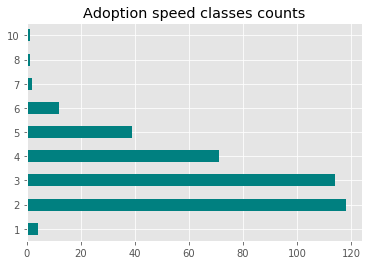

In [4]:
df['bedrooms'].value_counts().sort_index().plot('barh', color='teal');
plt.title('Adoption speed classes counts');

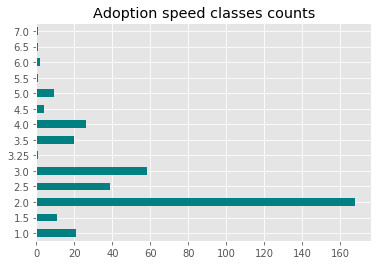

In [5]:
df['bathrooms'].value_counts().sort_index().plot('barh', color='teal');
plt.title('Adoption speed classes counts');

In [6]:
df['bathrooms']=df['bathrooms'].astype(int)

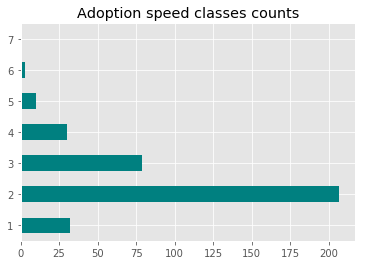

In [7]:
df['bathrooms'].value_counts().sort_index().plot('barh', color='teal');
plt.title('Adoption speed classes counts');

In [8]:
y_train = np_utils.to_categorical(df['bathrooms'], num_classes=8)

In [9]:
maxPrice = df["price"].max()

In [10]:
  df["price"]= df["price"] / maxPrice

In [11]:
	continuous = ["bedrooms", "area","price"]

	# performin min-max scaling each continuous feature column to
	# the range [0, 1]
	cs = MinMaxScaler()
	trainContinuous = cs.fit_transform(df[continuous])

/Users/zekunzhao/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [27]:
print(trainContinuous)

[[0.44444444 0.288776   0.129337  ]
 [0.22222222 0.17478965 0.05650979]
 [0.22222222 0.22940149 0.0719684 ]
 ...
 [0.22222222 0.10128592 0.05305737]
 [0.22222222 0.12240038 0.04706201]
 [0.33333333 0.31433561 0.09206458]]


In [12]:
	zipBinarizer = LabelBinarizer().fit(df["zipcode"])
	trainCategorical = zipBinarizer.transform(df["zipcode"])

In [26]:
print(trainCategorical)

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]]


In [13]:
x_train = np.hstack([trainCategorical, trainContinuous])

In [14]:
model = Sequential([
    Dense(32, input_dim=10),
    Activation('relu'),
    Dense(8),
    Activation('sigmoid'),
])
#softmax

In [21]:
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# We add metrics to get more results you want to see
#categorical_crossentropy--mse
model.compile(optimizer=rmsprop,
              loss='mse',
              metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train,epochs=200, batch_size=12)

Epoch 1/200
362/362 [==============================] - 0s 400us/step - loss: 0.0466 - acc: 0.7569
Epoch 2/200
362/362 [==============================] - 0s 84us/step - loss: 0.0464 - acc: 0.7514
Epoch 3/200
362/362 [==============================] - 0s 84us/step - loss: 0.0464 - acc: 0.7431
Epoch 4/200
362/362 [==============================] - 0s 80us/step - loss: 0.0464 - acc: 0.7431
Epoch 5/200
362/362 [==============================] - 0s 84us/step - loss: 0.0463 - acc: 0.7431
Epoch 6/200
362/362 [==============================] - 0s 95us/step - loss: 0.0463 - acc: 0.7459
Epoch 7/200
362/362 [==============================] - 0s 101us/step - loss: 0.0463 - acc: 0.7514
Epoch 8/200
362/362 [==============================] - 0s 97us/step - loss: 0.0463 - acc: 0.7569
Epoch 9/200
362/362 [==============================] - 0s 95us/step - loss: 0.0462 - acc: 0.7403
Epoch 10/200
362/362 [==============================] - 0s 99us/step - loss: 0.0463 - acc: 0.7541
Epoch 11/200
362/362 [=====

362/362 [==============================] - 0s 74us/step - loss: 0.0444 - acc: 0.7569
Epoch 85/200
362/362 [==============================] - 0s 74us/step - loss: 0.0444 - acc: 0.7597
Epoch 86/200
362/362 [==============================] - 0s 80us/step - loss: 0.0444 - acc: 0.7652
Epoch 87/200
362/362 [==============================] - 0s 80us/step - loss: 0.0444 - acc: 0.7541
Epoch 88/200
362/362 [==============================] - 0s 72us/step - loss: 0.0444 - acc: 0.7514
Epoch 89/200
362/362 [==============================] - 0s 69us/step - loss: 0.0443 - acc: 0.7541
Epoch 90/200
362/362 [==============================] - 0s 69us/step - loss: 0.0443 - acc: 0.7541
Epoch 91/200
362/362 [==============================] - 0s 71us/step - loss: 0.0442 - acc: 0.7680
Epoch 92/200
362/362 [==============================] - 0s 70us/step - loss: 0.0443 - acc: 0.7597
Epoch 93/200
362/362 [==============================] - 0s 69us/step - loss: 0.0442 - acc: 0.7569
Epoch 94/200
362/362 [===========

362/362 [==============================] - 0s 65us/step - loss: 0.0426 - acc: 0.7680
Epoch 168/200
362/362 [==============================] - 0s 69us/step - loss: 0.0425 - acc: 0.7680
Epoch 169/200
362/362 [==============================] - 0s 84us/step - loss: 0.0425 - acc: 0.7707
Epoch 170/200
362/362 [==============================] - 0s 81us/step - loss: 0.0425 - acc: 0.7680
Epoch 171/200
362/362 [==============================] - 0s 72us/step - loss: 0.0425 - acc: 0.7680
Epoch 172/200
362/362 [==============================] - 0s 69us/step - loss: 0.0424 - acc: 0.7597
Epoch 173/200
362/362 [==============================] - 0s 68us/step - loss: 0.0424 - acc: 0.7680
Epoch 174/200
362/362 [==============================] - 0s 67us/step - loss: 0.0424 - acc: 0.7652
Epoch 175/200
362/362 [==============================] - 0s 68us/step - loss: 0.0424 - acc: 0.7735
Epoch 176/200
362/362 [==============================] - 0s 71us/step - loss: 0.0423 - acc: 0.7624
Epoch 177/200
362/362 [=

In [23]:
loss, accuracy = model.evaluate(x_train, y_train)

print('test loss: ', loss)
print('test accuracy: ', accuracy)


362/362 [==============================] - 0s 115us/step
test loss:  0.04143154811505125
test accuracy:  0.7651933704950533
